In [1]:
from dotenv import load_dotenv
import os
import base64
import urllib
import requests as req
from bs4 import BeautifulSoup as bs
import json
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import re
import pandas as pd
import numpy as np

# priming the spotify API   

checking for client_id and client_secret

In [2]:
load_dotenv()	# draws from our .env file

client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')



print(client_id, client_secret) # checking!


482ffdd79ccc4595ae74ef0b9aa138ac 416fefa3cb614e22938fac1a37455ac6


functions for getting token and authorized header as documented by spotify

In [3]:
def get_token():
	auth_string = client_id + ':' + client_secret
	auth_bytes = auth_string.encode('utf-8')
	auth_base64 = str(base64.b64encode(auth_bytes), 'utf-8')
	url = 'https://accounts.spotify.com/api/token'
	headers = {
		'Authorization' : 'Basic ' + auth_base64,
		'Content-Type' : 'application/x-www-form-urlencoded'
	}
	data = {
		'grant_type' : 'client_credentials'
	}
	result = req.post(url, headers = headers, data = data)
	json_result = json.loads(result.content)
	token = json_result['access_token']
	return token


def get_auth_header(token):
	return {'Authorization' : 'Bearer ' + token}

token = get_token()
print(token)

BQDKADScmlRsUnMN8B6NBFZtdyO2KV3etlrDv3b0k68WuT_3GcY2tG18VEXIF8wiGwEJwTo7KafTTD_IeW9kDIWjbFHABsDDZufBVyRchi6Bux4eJu0


we will attempt to use the given tokens and implement some simple functions to confirm that it works

In [4]:
def search_for_artist(token : str, artist_name : str) -> dict:
	url = 'https://api.spotify.com/v1/search'
	headers = get_auth_header(token)
	#limit=1 limits to one artist in search
	query = f'?q={artist_name}&type=artist&limit=1'

	query_url = url + query
	result = req.get(query_url, headers = headers)
	json_result = json.loads(result.content)['artists']['items']
	if len(json_result) == 0:
		print('no artist')
		return None
	
	return json_result[0]

In [8]:
def get_songs_by_artist(token : str, artist_id : str, country : str = 'US') -> dict:
	url = f'https://api.spotify.com/v1/artists/{artist_id}/top-tracks?country={country}'

	headers = get_auth_header(token)
	result = req.get(url, headers = headers)
	json_result = json.loads(result.content)['tracks']

	# display artist image
	artist_url = f'https://api.spotify.com/v1/artists/{artist_id}'
	imgresult = req.get(artist_url, headers = get_auth_header(token))
	img_url = json.loads(imgresult.content)['images'][2]['url']
	urllib.request.urlretrieve(img_url, 'artist_img')

	Image.open('artist_img')

	# print artist top 10 tracks (is included in the return val)
	for no, song in enumerate(json_result, 1):
		print(f"{no}. {song['name']}")
	
	return json_result

In [9]:
changmo = search_for_artist(token, 'changmo')
changmo
iu = search_for_artist(token, 'IU')
iu

{'external_urls': {'spotify': 'https://open.spotify.com/artist/3HqSLMAZ3g3d5poNaI7GOU'},
 'followers': {'href': None, 'total': 8277421},
 'genres': ['k-pop', 'pop'],
 'href': 'https://api.spotify.com/v1/artists/3HqSLMAZ3g3d5poNaI7GOU',
 'id': '3HqSLMAZ3g3d5poNaI7GOU',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb006ff3c0136a71bfb9928d34',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174006ff3c0136a71bfb9928d34',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178006ff3c0136a71bfb9928d34',
   'width': 160}],
 'name': 'IU',
 'popularity': 69,
 'type': 'artist',
 'uri': 'spotify:artist:3HqSLMAZ3g3d5poNaI7GOU'}

In [10]:
songschangmo = get_songs_by_artist(token, changmo['id'])
print('\n')
songsiu = get_songs_by_artist(token, iu['id'])

1. Smoke (Prod. Dynamicduo, Padi) - Remix
2. METEOR
3. BAND
4. BLUE MOON (Prod. GroovyRoom)
5. SMF (Prod. Czaer)
6. 아름다워
7. 119 REMIX
8. Maestro
9. Selfmade Orange
10. wish


1. People Pt.2 (feat. IU)
2. eight(Prod.&Feat. SUGA of BTS)
3. LILAC
4. Celebrity
5. BBIBBI
6. Blueming
7. Can't Love You Anymore (With OHHYUK)
8. Palette (feat. G-DRAGON)
9. Through the Night
10. Good day


now that we confirmed the token is working, we will attempt to extract necessary datas from the Spotify-created playlists:

Spotify Top Hits of 2008: https://open.spotify.com/playlist/37i9dQZF1DWYuGZUE4XQXm       

Spotify Top Hits of 2009: https://open.spotify.com/playlist/37i9dQZF1DX4UkKv8ED8jp   
      
Spotify Top Hits of 2010: https://open.spotify.com/playlist/37i9dQZF1DXc6IFF23C9jj

Spotify Top Hits of 2011: https://open.spotify.com/playlist/37i9dQZF1DXcagnSNtrGuJ

Spotify Top Hits of 2012: https://open.spotify.com/playlist/37i9dQZF1DX0yEZaMOXna3

Spotify Top Hits of 2013: https://open.spotify.com/playlist/37i9dQZF1DX3Sp0P28SIer

Spotify Top Hits of 2014: https://open.spotify.com/playlist/37i9dQZF1DX0h0QnLkMBl4

Spotify Top Hits of 2015: https://open.spotify.com/playlist/37i9dQZF1DX9ukdrXQLJGZ

Spotify Top Hits of 2016: https://open.spotify.com/playlist/37i9dQZF1DX8XZ6AUo9R4R

Spotify Top Hits of 2017: https://open.spotify.com/playlist/37i9dQZF1DWTE7dVUebpUW

Spotify Top Hits of 2018: https://open.spotify.com/playlist/37i9dQZF1DXe2bobNYDtW8

Spotify Top Hits of 2019: https://open.spotify.com/playlist/37i9dQZF1DWVRSukIED0e9

Spotify Top Tracks of 2020: https://open.spotify.com/playlist/37i9dQZF1DX7Jl5KP2eZaS

Spotify Wrapped 2021: 


note) Spotify published playlists under the name 'Top Hits' until 2019, 'Top Tracks' on 2020, and since named their popular playlist 'Spotify Wrapped' as of 2021. 


# analysis

we will read from an outer csv file that contains the most streamed tracks in YouTube Music from 2010. 

> I attempted to draw from an outer website that had organized most streamed videos by years. However, the parsing of the artist and track name was difficult as the html table drew from youtube video titles, which did not have a fixed format. Also, I realized that the user base of Youtube Music was not what I expected to be. Therefore, I will attempt to utilized the Spotify API and their 'Spotify Wrapped' as a marker to popular music.

In [ ]:
youtube_music = {}

for top_mv_by_yr in range(2010, 2024):
    year = top_mv_by_yr
    url = f'https://kworb.net/youtube/topvideos{year}.html'
    youtube_music[top_mv_by_yr] = req.get(url)

In [ ]:
soup = bs(youtube_music[2023].text)
# extract views in str(\d\d\d,\d\d\d,\d\d\d) format and converted to int
views = list(map(lambda x : x.text.replace(',', ''), soup.find_all('td')[ 1 : : 2 ]))

# extract titles and artist
title_artist = list(map(lambda x : x.find('a').text, soup.find_all('td')[0 : : 2]))

# obtained url for another page in the website with an embedded link for the youtube file
url = []
for raw_url in soup.find_all('td')[0 : : 2]:
    inhouse = raw_url.find('a')['href']
    #print(f'worked for {listed}')
    inhouse_url = bs(req.get(f'https://kworb.net/youtube/{inhouse}').text).find_all('iframe')[0]['src']
    youtube_id = re.search(r'[^/]\w+[?$]', inhouse_url)[0][0 : -1]
    youtube_url = f'https://www.youtube.com/watch?v={youtube_id}'
    url.append(youtube_url)

print(title_artist[0], views[0])

df = pd.DataFrame([title_artist, views, url]).T
df.columns = ['title_artist', 'views', 'url']
df.index.name = '2023'
df

# I attempted to draw from an outer website that had organized most streamed videos by years.
# However, the parsing of the artist and track name was difficult 
# as the html table drew from youtube video titles, which did not have a fixed format. 
# Also, I realized that the user base of Youtube Music was not what I expected to be. 
# Therefore, I will attempt to utilized the Spotify API 
# and their 'Spotify Wrapped' as a marker to popular music.

we will now get a function to search the song on spotify, and forward them to a pandas dataframe. 

In [11]:
spotifyplaylists = {
'hits2008' : 'https://open.spotify.com/playlist/37i9dQZF1DWYuGZUE4XQXm',
'hits2009' : 'https://open.spotify.com/playlist/37i9dQZF1DX4UkKv8ED8jp',
'hits2010' : 'https://open.spotify.com/playlist/37i9dQZF1DXc6IFF23C9jj',
'hits2011' : 'https://open.spotify.com/playlist/37i9dQZF1DXcagnSNtrGuJ',
'hits2012' : 'https://open.spotify.com/playlist/37i9dQZF1DX0yEZaMOXna3',
'hits2013' : 'https://open.spotify.com/playlist/37i9dQZF1DX3Sp0P28SIer',
'hits2014' : 'https://open.spotify.com/playlist/37i9dQZF1DX0h0QnLkMBl4',
'hits2015' : 'https://open.spotify.com/playlist/37i9dQZF1DX9ukdrXQLJGZ',
'hits2016' : 'https://open.spotify.com/playlist/37i9dQZF1DX8XZ6AUo9R4R',
'hits2017' : 'https://open.spotify.com/playlist/37i9dQZF1DWTE7dVUebpUW',
'hits2018' : 'https://open.spotify.com/playlist/37i9dQZF1DXe2bobNYDtW8',
'hits2019' : 'https://open.spotify.com/playlist/37i9dQZF1DWVRSukIED0e9',
'hits2020' : 'https://open.spotify.com/playlist/37i9dQZF1DX7Jl5KP2eZaS',
'hits2022' : 'https://open.spotify.com/playlist/37i9dQZF1DX18jTM2l2fJY'
}

In [12]:
get_playlist_id = lambda x : re.search(r'[^/]\d\w+[\w$]', x).group(0)

for key, val in spotifyplaylists.items():
    print(get_playlist_id(val))


37i9dQZF1DWYuGZUE4XQXm
37i9dQZF1DX4UkKv8ED8jp
37i9dQZF1DXc6IFF23C9jj
37i9dQZF1DXcagnSNtrGuJ
37i9dQZF1DX0yEZaMOXna3
37i9dQZF1DX3Sp0P28SIer
37i9dQZF1DX0h0QnLkMBl4
37i9dQZF1DX9ukdrXQLJGZ
37i9dQZF1DX8XZ6AUo9R4R
37i9dQZF1DWTE7dVUebpUW
37i9dQZF1DXe2bobNYDtW8
37i9dQZF1DWVRSukIED0e9
37i9dQZF1DX7Jl5KP2eZaS
37i9dQZF1DX18jTM2l2fJY


In [13]:
def get_playlist_info(token : str, playlist_id : str) -> dict:
	'''
	This function takes the ID of a Spotify playlist and returns attributes associated with it

	@param token : The Spotify API Token provided by function get_token()
	@param playlist_id : The playlist ID associated with the playlist to analyze

	@return : returns the attributes of the Spotify playlist

	'''
	url = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'

	headers = get_auth_header(token)
	result = req.get(url, headers = headers)
	json_result = json.loads(result.content)
	return json_result

def get_playlist_tracks(playlist_json : dict) -> dict:
	'''
	This function takes the return value of function 'get_playlist_info' and returns track ids of the tracks in the playlist

	@param playlist_json : attributes of a Spotify playlist

	@return : returns a dict of keys= name of track, and vals= IDs of the tracks in the playlist

	'''
	playlist_tracks = {}
	for tracks in playlist_json['items']:
		playlist_tracks[tracks['track']['name']] = tracks['track']['id']
	return playlist_tracks

def get_track_info(token : str, track_id : str) -> pd.Series:
	'''
	This function takes the the ID of a Spotify track and returns attributes associated with it

	@param token : The Spotify API Token provided by function get_token()
	@param track_id : The track ID associated with the track to analyze

	@return : returns a pandas Series with variables: artists, duration, name, popularity.

	'''
	url = f'https://api.spotify.com/v1/tracks/{track_id}'
    
	headers = get_auth_header(token)
	result = req.get(url, headers = headers)
	json_result = json.loads(result.content)
    
	artists = json_result['artists'][0]['name']
	duration_ms = json_result['duration_ms'] 

	min = int(duration_ms / 60000)
	sec = str(((duration_ms / 60000) - min) * 0.6)[2:4]
	duration = str(min) + ':' + sec
	track_name = json_result['name']
	release_year = int(re.search(r'\d\d\d\d', json_result['album']['release_date']).group(0))
	popularity = json_result['popularity']
	

	return pd.Series([track_name, artists, duration, duration_ms, release_year, popularity])


In [14]:
def streamline(token : str, playlist_id : str) -> pd.DataFrame:
    '''
    This function streamlines the process of creating a dataframe from the playlist ID, combining 3 functions: get_playlist_info, 
    get_playlist_tracks, get_track_info.
    It also breaks when n exceeds 50 for consistency on playlists
    '''
    playlist_json = get_playlist_info(token, playlist_id)
    playlist_tracks = get_playlist_tracks(playlist_json)

    df = pd.DataFrame()
    for track_id in playlist_tracks.values():
        new_row = pd.DataFrame(get_track_info(token, track_id)).T
        df = pd.concat([df, new_row])
        if (df.shape[0] >= 50):
            break;

    df.columns = ['track_name', 'artist', 'duration', 'duration_ms', 'release_year', 'popularity']
    df.index.name = df.release_year.mode()[0]
    df.index = range(df.shape[0])
    return df

In [15]:
hits2020df = streamline(token,'37i9dQZF1DX7Jl5KP2eZaS')

In [16]:
hits2020df[['release_year', 'popularity']].groupby('release_year').agg('count')

,popularity
release_year,
2016,1
2018,3
2019,20
2020,23
2021,3


In [17]:
get_track_info(token, '7x9aauaA9cu6tyfpHnqDLo')

0    Seven (feat. Latto) (Explicit Ver.)
1                              Jung Kook
2                                   3:04
3                                 184400
4                                   2023
5                                     94
dtype: object

In [18]:
hitsdf = {}

for key, val in spotifyplaylists.items():
    dfname = str(key) + 'df'
    playlist_id = get_playlist_id(val)
    hitsdf[dfname] = streamline(token, playlist_id)

In [19]:
# I have the data for 2021 in a .csv format, from a Kaggle dataset (https://www.kaggle.com/datasets/equinxx/spotify-top-50-songs-in-2021),
# so I will extract the track IDs from the .csv file and forward it to the get_track_info() function, and then add it to the hitsdf dictionary.

hits2021 = pd.read_csv('./hits2021.csv')


df21 = pd.DataFrame()
for track_id in hits2021.id:
    new_row = pd.DataFrame(get_track_info(token, track_id)).T
    df21 = pd.concat([df21, new_row])
    if (df21.shape[0] >= 50):
        break

df21.columns = ['track_name', 'artist', 'duration', 'duration_ms', 'release_year', 'popularity']
df21.index.name = 2021
df21.index = range(df21.shape[0])

hitsdf['hits2021df'] = df21

# I have the data for 2023 in a .csv format as well, 
# unfortunately, the 2023 dataset from kaggle (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)
# does not include track IDs, so I will search them using the search_for_track() function.
# to be sure I will compare the danceability score (provided by Spotify API and the 18th column in hits2023.csv) and add only if they match


def search_for_track(token : str, track_name : str, danceability_score : int) -> str:
	'''
	function takes track_name and returns the Spotify track ID. 
	built specifically for the hits2023.csv file

	@ param track_name : name of the track
	@ param danceability_score : extracted from column 18 of hits2023.csv

	@ return : Spotify track ID
	'''
	
	url = 'https://api.spotify.com/v1/search'
	headers = get_auth_header(token)

	#limit=1 limits to one track in search
	query = f'?q={track_name}&type=track&limit=1'
	
	query_url = url + query
	result = req.get(query_url, headers=headers)
	json_result = json.loads(result.content)['tracks']['items']
	if len(json_result) == 0:
		return None

	track_id = json_result[0]['id']
	audio_features = req.get(f'https://api.spotify.com/v1/audio-features/{track_id}', headers=headers)
	danceability = int(json.loads(audio_features.content)['danceability'] * 100)
	if danceability != danceability_score:
		return None
	
	return track_id

hits2023 = pd.read_csv('./hits2023.csv')
hits2023
trackname = hits2023['track_name']
danceability = hits2023['danceability_%']

zipped = list(zip(trackname, danceability))


track_ids_2023 = []
for trackname, danceability in zipped:
    track_id = search_for_track(token, trackname, danceability)
    if (track_id == None):
        continue
    else:
        track_ids_2023.append(track_id)
    
    if (len(track_ids_2023) >= 50):
        break


df23 = pd.DataFrame()
for track_id in track_ids_2023:
    new_row = pd.DataFrame(get_track_info(token, track_id)).T
    df23 = pd.concat([df23, new_row])
df23.columns = ['track_name', 'artist', 'duration', 'duration_ms', 'release_year', 'popularity']
df23.index.name = 2023
df23.index = range(df23.shape[0])

hitsdf['hits2023df'] = df23



In [52]:
# scaffoldings

#get_track_info(token, '7x9aauaA9cu6tyfpHnqDLo')
track_ids_2023
hitsdf.keys()

dict_keys(['hits2008df', 'hits2009df', 'hits2010df', 'hits2011df', 'hits2012df', 'hits2013df', 'hits2014df', 'hits2015df', 'hits2016df', 'hits2017df', 'hits2018df', 'hits2019df', 'hits2020df', 'hits2022df', 'hits2021df', 'hits2023df'])

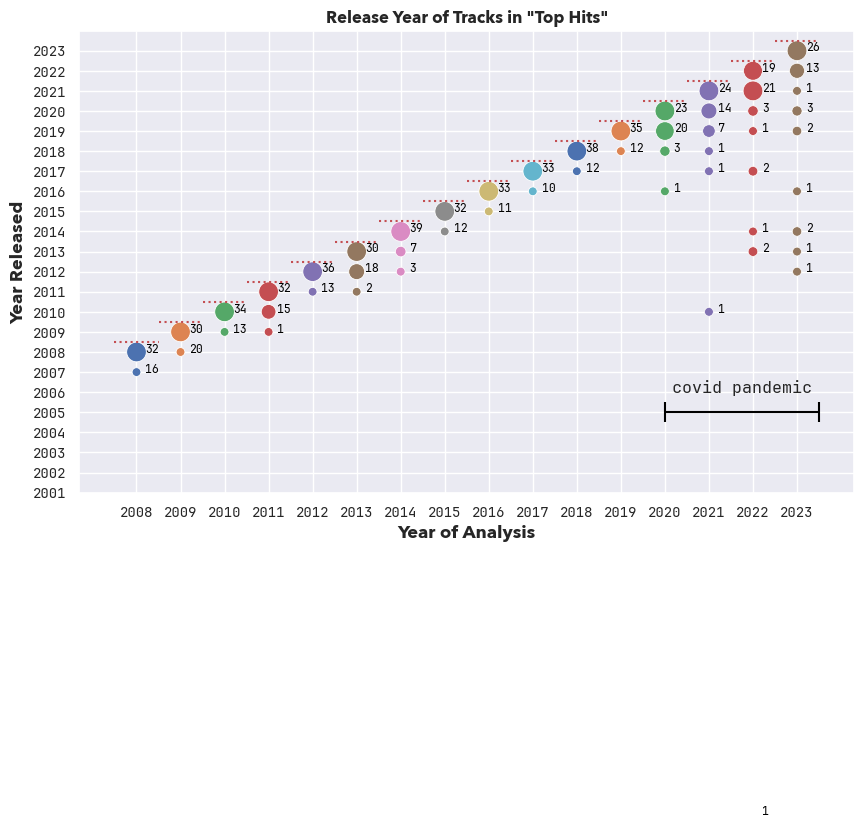

In [24]:
plt.figure(figsize=(10, 6))
sns.set_theme()
jbmono = {'fontname' : 'Jetbrains Mono NL'}
avenir = {'fontname' : 'Avenir Next'}



#fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)  # draws 2 figures in one plot
#ax_bottom.set_position([0, 0, 10, 2])  # [left, bottom, width, height]
#fig.subplots_adjust(hspace = 0.05) # vertical distance between 2 figures


sized_scatterplot = {}
for key, val in hitsdf.items():
    temp = val[['release_year', 'popularity']].groupby('release_year').agg('count')

    # gets year of analysis from the key
    year_of_analysis = re.search(r'\d\d\d\d', key).group(0)
    yoa_int = int(year_of_analysis) # saves year_of_analysis in int form, to ignore tracks added to Spotify after year of analysis 
                                    # this could be due to multiple reasons, but I chose to simply drop these values

    # redefine temp to drop tracks which were added after the year of analysis
    temp = temp.loc[temp.index <= yoa_int]

    # gets the counts of tracks released in a certain year
    counts = list(temp.values.T[0])
    # gets the years tracks were released in
    year_released = list(temp.index)


    # priming a dictionary to use for the scatterplot (x-axis: year of analysis, y-axis: tracks' year of release)
    sized_scatterplot[year_of_analysis] = pd.DataFrame({'counts' : counts, 'year_released' : year_released})

    sns.scatterplot(data=sized_scatterplot[year_of_analysis], x=int(year_of_analysis), y='year_released', size='counts', sizes=(40, 200), legend=False)
    #sns.scatterplot(data=sized_scatterplot[year_of_analysis], x=int(year_of_analysis), y='year_released', size='counts', sizes=(40, 200), legend=False, ax=ax_bottom)
   
    # text) the count of songs released in the given year
    for line in range(0, sized_scatterplot[year_of_analysis].shape[0]):
        plt.text(int(year_of_analysis) + 0.2, 
                 sized_scatterplot[year_of_analysis]['year_released'][line], 
                 sized_scatterplot[year_of_analysis]['counts'][line], 
                 horizontalalignment='left', size='x-small', color='black', weight='normal', **jbmono)
    plt.hlines(int(year_of_analysis) + 0.5, int(year_of_analysis) - 0.5, int(year_of_analysis) + 0.5, color='r', linestyles='dotted')


# because we have an outlier (1975), we will divide the plots into subplots as a broken y-axis 
# note) the outlier is 'Bohemian Rapsody' by Queen, appearing on 2019's statistics, which is the year movie 'Bohemian Rapsody' was released





#ax_top.set_ylim(2000, 2025) # 윗 부분 y축 범위 설정
#ax_bottom.set_ylim(1973, 1980) # 아랫 부분 y축 범위 설정



plt.title('Release Year of Tracks in "Top Hits"', **avenir)
plt.xlabel('Year of Analysis', fontsize=13, **avenir)
plt.ylabel('Year Released', fontsize=13, **avenir)
plt.xticks(range(2008, 2024, 1), fontsize=10, **jbmono)

plt.yticks(range(2000, 2024, 1), fontsize=10, **jbmono)
#ax_bottom.yticks(range(1960, 1980, 1), fontsize=10, **jbmono)
plt.ylim(2001, 2024)


# visual
plt.hlines(2005, 2023.5, 2020, color='black')
plt.vlines(2020, 2004.5, 2005.5, color='black')
plt.vlines(2023.5, 2004.5, 2005.5, color='black')
plt.text(2020.15, 2006, 'covid pandemic', **jbmono)


plt.show()

In [63]:
hitsdf['hits2022df'][['popularity', 'release_year']].groupby('release_year').agg('count')
hitsdf['hits2022df'].loc[hitsdf['hits2022df']['release_year'] == 2013]

,track_name,artist,duration,duration_ms,release_year,popularity
20,Sweater Weather,The Neighbourhood,4:00,240400,2013,92
22,Another Love,Tom Odell,4:04,244360,2013,92


### note on outliers

year of analysis:
    2019: Bohemian Rapsody (Queen) -> release of movie 'Bohemian Rapsody'
    2022: Running Up That Hill (Kate Bush) -> OST for stranger things

# Analysis on Lyrics

because the vanilla attributes offered by Spotify API rather lacks detailed information I would like for my analysis such as genre and country of release, I will get help from an outer database, Genius.com. 

I will authenticate with the Genius API to get 2 new columns: 'lyrics' and 'language'

In [20]:
# move to .env later

client_id_Genius = 'mQroggO0IRYSilrB8Cn264B6ESGUX6qnA-X4113TK0Eo5IVMVYWjAcX1OGymn_dP'
client_secret_Genius = 'jJgMAXift-Z9oy28Li8OU33kD-ttRmQVBb7W293DMld3baTf07dYDFXDTZjWoWdhxGxCGCvjOVOufXu5Eq7YQA'

#load_dotenv()	# draws from our .env file

#client_i_Genius = os.getenv('CLIENT_ID_GENIUS')
#client_secret_Genius = os.getenv('CLIENT_SECRET_GENIUS')

'<!doctype html><html lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Seven, Jungkook lyrics - Google Search</title><script nonce="cVzJLjewgF7H6qJVjenJbw">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=windo
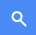
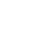
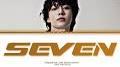
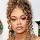
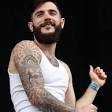

In [ ]:
def get_token_Genius():
	auth_string = client_id_Genius + ':' + client_secret_Genius
	url = 'https://accounts.spotify.com/api/token'
	headers = {
		'Authorization' : 'Basic ' + auth_base64,
		'Content-Type' : 'application/x-www-form-urlencoded'
	}
	data = {
		'grant_type' : 'client_credentials'
	}
	result = req.post(url, headers = headers, data = data)
	json_result = json.loads(result.content)
	token = json_result['access_token']
	return token


def get_auth_header(token):
	return {'Authorization' : 'Bearer ' + token}

token = get_token()
print(token)

In [24]:
https://api.genius.com/oauth/authorize?
client_id=YOUR_CLIENT_ID&
redirect_uri=YOUR_REDIRECT_URI&
scope=manage_annotation&
state=SOME_STATE_VALUE&
response_type=code

bVFyb2dnTzBJUllTaWxyQjhDbjI2NEI2RVNHVVg2cW5BLVg0MTEzVEswRW81SVZNVllXakFjWDFPR3ltbl9kUDpqSmdNQVhpZnQtWjlveTI4TGk4T1UzM2tELXR0Um1RVkJiN1cyOTNETWxkM2JhVGYwN2RZREZYRFRaaldvV2RoeEd4Q0dDdmpPVk91Zlh1NUVxN1lRQQ==


[]